In [2]:
from codebase import web_scrape_functions as wsf
from codebase import analysis_functions as af
from codebase import match_data
import pandas as pd
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import utils
from utils import logger
import os
import logging
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import codebase.graphing_functions as gf
from codebase.settings import CAREERS

%load_ext autoreload
%autoreload 2
logger.handlers[1].setLevel(logging.INFO)
# logger.disabled = True
pd.get_option("display.max_columns")

20

In [3]:
KOHLI_ID = 253802
ROOT_PLAYER_ID = 303669
WILLIAMSON_PLAYER_ID = 277906
SPD_SMITH_ID = 267192

In [4]:
# Breakdown of dismissals, we want to see sum how Kohli has got out over time and graph this.
# Need to make individuals 'lines' for each dismissal type. Lets just first start with getting Kohli's test innings and then summing dismissals.
match_list = wsf.player_match_list(KOHLI_ID)
bad_forma_matches = match_list[84:]


2022-07-09 22:06:02,471 - INFO - Getting match list for player: 253802 Dates: None


In [11]:
all_totals = af.get_cricket_totals(KOHLI_ID, matches=match_list, _type='bat', by_innings=True, is_object_id=True)

2022-07-03 11:05:13,125 - INFO - Getting player controbutions for match 489226
2022-07-03 11:05:13,127 - INFO - Loading data from d:\Documents\Cricket\data_analysis\cricket_data_analysis\data\match_jsons\489226_match_jsons.json
2022-07-03 11:05:13,131 - INFO - Loading data from d:\Documents\Cricket\data_analysis\cricket_data_analysis\data\htmls\489226_html.html
2022-07-03 11:05:13,314 - INFO - Match ID 489226: Loading match comms
2022-07-03 11:05:13,316 - INFO - Loading data from d:\Documents\Cricket\data_analysis\cricket_data_analysis\data\full_comms\489226_full_comms.json
2022-07-03 11:05:13,509 - INFO - Getting player totals for match: 489226 Player: 253802
2022-07-03 11:05:13,510 - INFO - Pre-transforming match commentary for 489226
2022-07-03 11:05:13,530 - INFO - 489226: Processing text commentary fields
2022-07-03 11:05:13,894 - INFO - 489226: Processing bowler runs
2022-07-03 11:05:13,953 - INFO - Getting player controbutions for match 489227
2022-07-03 11:05:13,955 - INFO - Lo

In [12]:
import math
dismissals = {}
for inning in all_totals:
    try:
        dismissals[inning['how_out']] += 1
    except KeyError:
        dismissals[inning['how_out']] = 1

In [14]:
dismissals

{'caught': 111,
 'lbw': 35,
 'run_out': 2,
 False: 11,
 'bowled': 12,
 'hit_wicket': 1}

In [36]:
test = [{'how_out':'caught'},{'how_out':'caught'},{'how_out':'caught'},{'how_out':'caught'},{'how_out':'caught'},{'how_out':'caught'}]

In [44]:
dismissal_histories = {}
for i, inning in enumerate(all_totals):
    try:
        dismissal_histories[inning['how_out']] += [dismissal_histories[inning['how_out']][-1]+1]
    except KeyError:
        dismissal_histories[inning['how_out']] = [0]*(i) + [1]        
    for d in dismissal_histories:
        if d != inning['how_out']:
            dismissal_histories[d] += [dismissal_histories[d][-1]]

<AxesSubplot:>

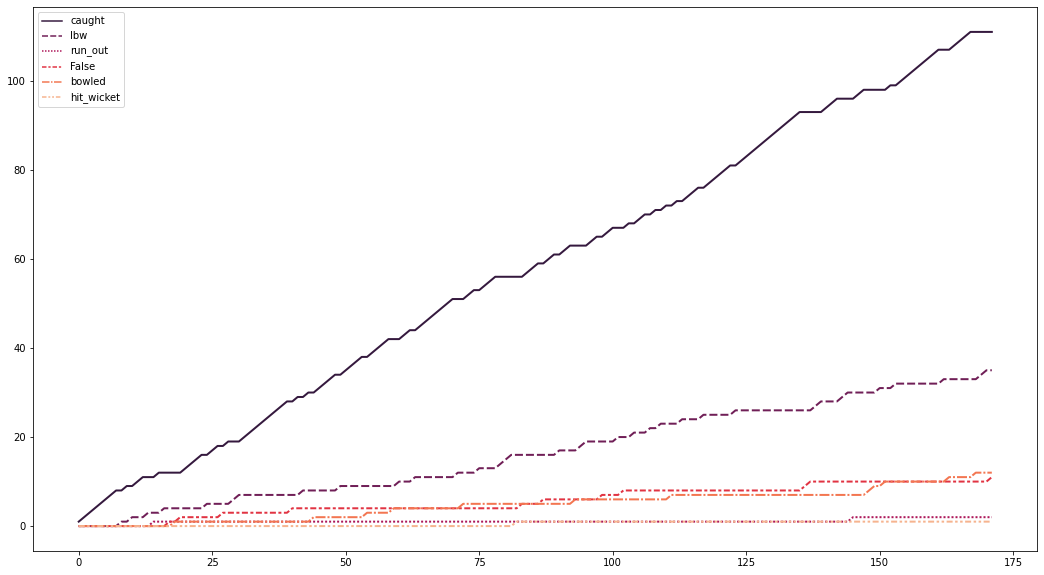

In [47]:
fig, ax1 = plt.subplots(figsize=(18,10)) 
sns.lineplot(data = dismissal_histories, ax=ax1, sort = False, palette='rocket', linewidth=2)

2022-07-03 16:14:36,139 - INFO - Getting match list for player, 253802
2022-07-03 16:14:36,141 - INFO - Getting match list for player: 253802 Dates: None
2022-07-03 16:14:39,216 - INFO - Getting player contributions for 253802
2022-07-03 16:14:39,217 - INFO - Getting player controbutions for match 489226
2022-07-03 16:14:39,219 - INFO - Loading data from d:\Documents\Cricket\data_analysis\cricket_data_analysis\data\match_jsons\489226_match_jsons.json
2022-07-03 16:14:39,225 - INFO - Loading data from d:\Documents\Cricket\data_analysis\cricket_data_analysis\data\htmls\489226_html.html
2022-07-03 16:14:39,585 - INFO - Match ID 489226: Loading match comms
2022-07-03 16:14:39,588 - INFO - Loading data from d:\Documents\Cricket\data_analysis\cricket_data_analysis\data\full_comms\489226_full_comms.json
2022-07-03 16:14:39,831 - INFO - Getting player totals for match: 489226 Player: 253802
2022-07-03 16:14:39,832 - INFO - Pre-transforming match commentary for 489226
2022-07-03 16:14:39,861 - 

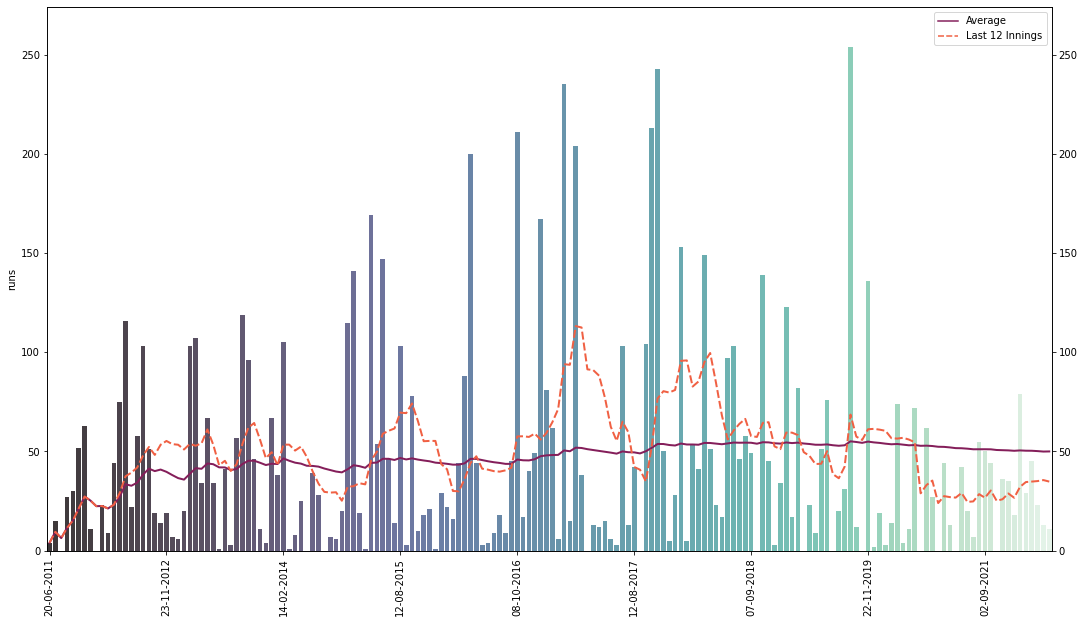

In [57]:
gf.get_career_batting_graph(KOHLI_ID)

In [59]:
def graph_dismissals(player_id, match_list = None, dates = None):
    if not match_list:
        match_list = wsf.player_match_list(player_id, dates=dates)
    all_totals = af.get_cricket_totals(player_id, matches=match_list, _type='bat', by_innings=True, is_object_id=True)
    dismissal_histories = {}
    for i, inning in enumerate(all_totals):
        try:
            dismissal_histories[inning['how_out']] += [dismissal_histories[inning['how_out']][-1]+1]
        except KeyError:
            dismissal_histories[inning['how_out']] = [0]*(i) + [1]        
        for d in dismissal_histories:
            if d != inning['how_out']:
                dismissal_histories[d] += [dismissal_histories[d][-1]]
    
    fig, ax1 = plt.subplots(figsize=(18,10)) 
    sns.lineplot(data = dismissal_histories, ax=ax1, sort = False, palette='rocket', linewidth=2)

2022-07-03 16:26:22,360 - INFO - Getting player controbutions for match 1187007
2022-07-03 16:26:22,362 - INFO - Loading data from d:\Documents\Cricket\data_analysis\cricket_data_analysis\data\match_jsons\1187007_match_jsons.json
2022-07-03 16:26:22,366 - INFO - Loading data from d:\Documents\Cricket\data_analysis\cricket_data_analysis\data\htmls\1187007_html.html
2022-07-03 16:26:22,778 - INFO - Match ID 1187007: Loading match comms
2022-07-03 16:26:22,780 - INFO - Loading data from d:\Documents\Cricket\data_analysis\cricket_data_analysis\data\full_comms\1187007_full_comms.json
2022-07-03 16:26:22,846 - INFO - Getting player totals for match: 1187007 Player: 253802
2022-07-03 16:26:22,848 - INFO - Pre-transforming match commentary for 1187007
2022-07-03 16:26:22,903 - INFO - 1187007: Processing text commentary fields
2022-07-03 16:26:23,353 - INFO - 1187007: Processing bowler runs
2022-07-03 16:26:23,504 - INFO - Dismissal code was nan
2022-07-03 16:26:23,505 - INFO - Getting player c

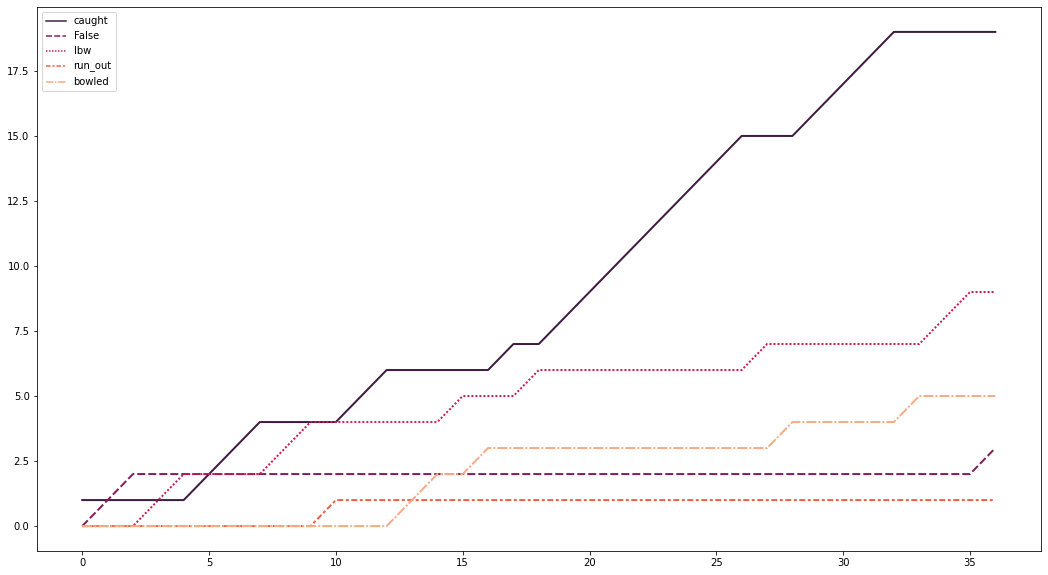

In [60]:
graph_dismissals(KOHLI_ID, match_list=match_list[-23:])

In [61]:
match_list[-23]

'1187007'

2022-07-03 16:55:38,292 - INFO - Getting match list for player, 253802
2022-07-03 16:55:38,294 - INFO - Getting match list for player: 253802 Dates: 2020-02-21:
2022-07-03 16:55:40,686 - INFO - Getting player contributions for 253802
2022-07-03 16:55:40,688 - INFO - Getting player controbutions for match 1187685
2022-07-03 16:55:40,691 - INFO - Loading data from d:\Documents\Cricket\data_analysis\cricket_data_analysis\data\match_jsons\1187685_match_jsons.json
2022-07-03 16:55:40,697 - INFO - Loading data from d:\Documents\Cricket\data_analysis\cricket_data_analysis\data\htmls\1187685_html.html
2022-07-03 16:55:41,209 - INFO - Match ID 1187685: Loading match comms
2022-07-03 16:55:41,211 - INFO - Loading data from d:\Documents\Cricket\data_analysis\cricket_data_analysis\data\full_comms\1187685_full_comms.json
2022-07-03 16:55:41,505 - INFO - Getting player totals for match: 1187685 Player: 253802
2022-07-03 16:55:41,506 - INFO - Pre-transforming match commentary for 1187685
2022-07-03 1

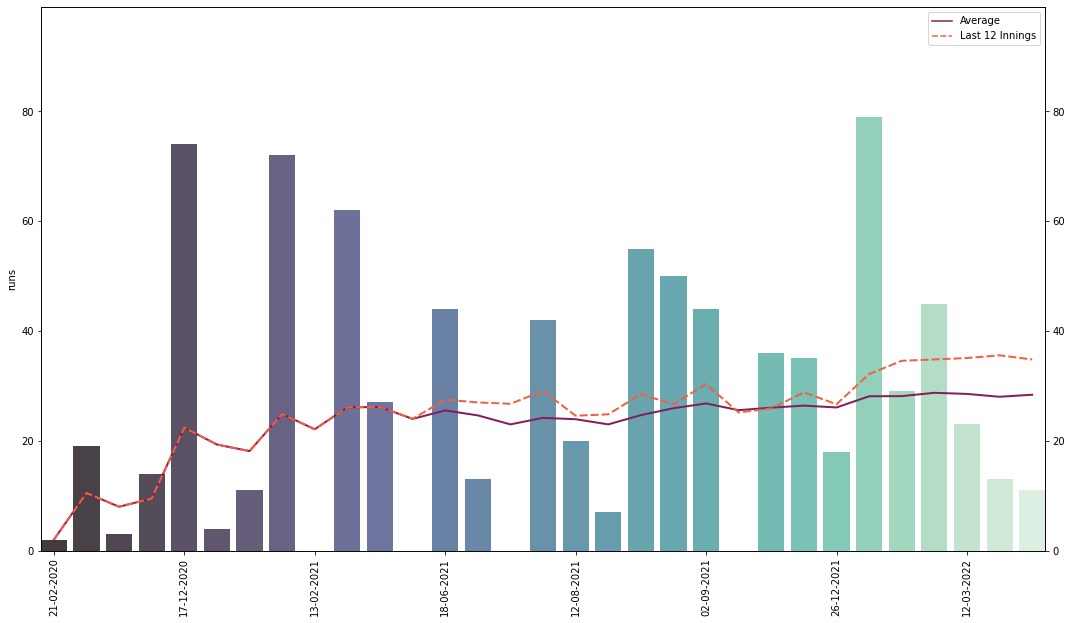

In [63]:
gf.get_career_batting_graph(KOHLI_ID, dates='2020-02-21:')

In [4]:
# Lets see the text of Virat Kohli's actually dismissals. So get matches, get the comms from the matches and then pull the commentary text from there. 

In [5]:
# Lets only analyse Kohli's recent "bad form"
kohli_bad_form_comms = af.get_player_contributions(KOHLI_ID, bad_forma_matches, 'bat', True, True)

2022-07-09 22:06:14,932 - INFO - Loading data from d:\Documents\Cricket\data_analysis\cricket_data_analysis\data\match_jsons\1187685_match_jsons.json
2022-07-09 22:06:14,955 - INFO - Loading data from d:\Documents\Cricket\data_analysis\cricket_data_analysis\data\htmls\1187685_html.html
2022-07-09 22:06:15,098 - INFO - Match ID 1187685: Loading match comms
2022-07-09 22:06:15,099 - INFO - Loading data from d:\Documents\Cricket\data_analysis\cricket_data_analysis\data\full_comms\1187685_full_comms.json
2022-07-09 22:06:15,175 - INFO - Pre-transforming match commentary for 1187685
2022-07-09 22:06:15,217 - INFO - 1187685: Processing text commentary fields
2022-07-09 22:06:15,478 - INFO - 1187685: Processing bowler runs
2022-07-09 22:06:15,566 - INFO - Loading data from d:\Documents\Cricket\data_analysis\cricket_data_analysis\data\match_jsons\1187686_match_jsons.json
2022-07-09 22:06:15,587 - INFO - Loading data from d:\Documents\Cricket\data_analysis\cricket_data_analysis\data\htmls\11876

In [6]:
all_dismissals = []
for match in kohli_bad_form_comms:
    comms = match.iloc[-1]
    
    if comms.dismissalText not in [None, 'null', 'NaN', 'None']:
        print(comms.dismissalText)
        all_dismissals.append((comms.commentTextItems, comms.dismissalText))
    else:
        print(comms.commentTextItems)

Virat kohli c taylor b jamieson 2 (9m 7b 0x4 0x6) sr: 28.57
Virat kohli c †watling b boult 19 (61m 43b 3x4 0x6) sr: 44.18
Virat kohli lbw b southee 3 (23m 15b 0x4 0x6) sr: 20
Virat kohli lbw b de grandhomme 14 (40m 30b 3x4 0x6) sr: 46.66
Virat kohli run out (hazlewood/lyon) 74 (244m 180b 8x4 0x6) sr: 41.11
Virat kohli c green b cummins 4 (13m 8b 1x4 0x6) sr: 50
Virat kohli c pope b bess 11 (69m 48b 0x4 0x6) sr: 22.91
Virat kohli b stokes 72 (153m 104b 9x4 0x6) sr: 69.23
Virat kohli b ali 0 (6m 5b 0x4 0x6) sr: 0
Virat kohli lbw b ali 62 (200m 149b 7x4 0x6) sr: 41.61
Virat kohli b leach 27 (85m 58b 3x4 0x6) sr: 46.55
Virat kohli c †foakes b stokes 0 (13m 8b 0x4 0x6) sr: 0
Virat kohli lbw b jamieson 44 (196m 132b 1x4 0x6) sr: 33.33
Virat kohli c †watling b jamieson 13 (43m 29b 0x4 0x6) sr: 44.82
Virat kohli c †buttler b anderson 0 (2m 1b 0x4 0x6) sr: 0
Virat kohli c root b robinson 42 (152m 103b 3x4 0x6) sr: 40.77
Virat kohli c †buttler b curran 20 (54m 31b 4x4 0x6) sr: 64.51
Virat kohli 

In [34]:
all_dismissals

['What a dream debut so far!  the debutant gets the edge, and cap no 100 at first slip makes no mistake. fullish, outside off, inviting kohli for the drive. he looks to hit straight past the bowler, but the ball takes the outside edge instead. taylor tumbles backwards to take the catch, but ensures it stays safely within his hands',
 "He's nicked it! boult goes short, kohli looks to take him on by pulling, but he's hurried by the faster delivery, and misses the shot. takes a bit of the bat and bj makes no mistake. failed in both innings (for his standards)",
 "And he has got kohli first up but kohli reviews with one second to go. this is desperate reviewing, and he will be hoping there is an umpire's call on it because there is no way this is not out. this is just too good from southee. pitches it up for the outswinger, the ball seams back in after pitching, beats the inside edge on the drive, and he is hit plumb in front. wastes the review. will hate it for rahane or pujara to get a s

In [11]:
count = 0
for dismissal in all_dismissals:
    for word in ['drive', 'cover', 'defending', 'defence', 'outside']:
        if word in dismissal[0].lower():
            if 'run out' not in dismissal[1].lower():
                print(dismissal[0])
                print()
                count += 1
                break

print(f'Dismissals that include key-words: {count}')
print(f'Dismissals that include key-words: {count/len(all_dismissals)}')

What a dream debut so far!  the debutant gets the edge, and cap no 100 at first slip makes no mistake. fullish, outside off, inviting kohli for the drive. he looks to hit straight past the bowler, but the ball takes the outside edge instead. taylor tumbles backwards to take the catch, but ensures it stays safely within his hands

And he has got kohli first up but kohli reviews with one second to go. this is desperate reviewing, and he will be hoping there is an umpire's call on it because there is no way this is not out. this is just too good from southee. pitches it up for the outswinger, the ball seams back in after pitching, beats the inside edge on the drive, and he is hit plumb in front. wastes the review. will hate it for rahane or pujara to get a stinker from the umpire now. back to the delivery: this is the classic plan to kohli. keep bowling outside off for swing, and if it seams, you expose the other edge too. tood good on the day. a less attacking batsman would have probably

In [39]:
len(all_dismissals)

32

In [12]:
comms_pre_slump = af.get_player_contributions(KOHLI_ID, match_list[:84], 'bat', True, True)
all_every_dismissals = []
for match in comms_pre_slump:
    comms = match.iloc[-1]
    
    if comms.dismissalText not in [None, 'null', 'NaN', 'None']:
        #print(comms.dismissalText)
        all_every_dismissals.append((comms.commentTextItems, comms.dismissalText))
    else:
        print(comms.commentTextItems)

every_count = 0
for dismissal in all_every_dismissals:
    for word in ['drive', 'cover', 'defending', 'defence', 'outside']:
        if word in dismissal[0].lower():
            if 'run out' not in dismissal[1].lower():
                print(dismissal[0])
                print()
                every_count += 1
                break

print(f'Dismissals that include key-words: {every_count}')
print(f'Dismissals that include key-words: {every_count/len(all_every_dismissals)}')

2022-07-08 11:41:04,539 - INFO - Loading data from d:\Documents\Cricket\data_analysis\cricket_data_analysis\data\match_jsons\489226_match_jsons.json
2022-07-08 11:41:04,559 - INFO - Loading data from d:\Documents\Cricket\data_analysis\cricket_data_analysis\data\htmls\489226_html.html
2022-07-08 11:41:04,880 - INFO - Match ID 489226: Loading match comms
2022-07-08 11:41:04,905 - INFO - Loading data from d:\Documents\Cricket\data_analysis\cricket_data_analysis\data\full_comms\489226_full_comms.json
2022-07-08 11:41:05,009 - INFO - Pre-transforming match commentary for 489226
2022-07-08 11:41:05,056 - INFO - 489226: Processing text commentary fields
2022-07-08 11:41:05,460 - INFO - 489226: Processing bowler runs
2022-07-08 11:41:05,532 - INFO - Loading data from d:\Documents\Cricket\data_analysis\cricket_data_analysis\data\match_jsons\489227_match_jsons.json
2022-07-08 11:41:05,555 - INFO - Loading data from d:\Documents\Cricket\data_analysis\cricket_data_analysis\data\htmls\489227_html.h

Brings up his fifty as well! exquisite straight drive this time, southee lands it too full on the stumps and kohli merely pushes it through the line past the bowler
Full, punched down the ground and that's the test
The field comes up to keep kohli on strike, and he walks down the wicket to drive this shortish ball on the up and between cover and extra cover
Fullish, but still wide enough outside off to leave alone
Worked away into the gap at midwicket
Legbreak, from leg, kohli lets it turn, opens the face of the bat, gets a couple past point
Short, angling into leg stump, pulled to long leg
 gets to his 50th international century in grand style!  goes down on one knee and lets out a roar towards the dressing room.  india have declared.  coming back to the shot, this was a length ball outside off, kohli advances down the pitch and then slaps this with a horizontal bat over extra cover. flat hit, but wow, that just flew off the blade. the emotions were in check for a split-second or two,

In [21]:
def search_for_keywords(text_items, keywords = [], exclude_words = [], return_matching = False):
    count = 0
    matching = []
    for text in text_items:
        for word in keywords:
            if word in text.lower():
                exclude = False
                for e_word in exclude_words:
                    if e_word in text.lower():
                        exclude = True
                        break
                if exclude:
                    break
                count += 1
                matching.append(text)
                break
    if return_matching:
        return count, matching
    return count

In [7]:
all_dismissals = [dismissal[0] + ', ' + dismissal[1] for dismissal in all_dismissals]

In [24]:
count, matching = search_for_keywords(all_dismissals, ['drive', 'cover', 'defending', 'defence', 'outside'], exclude_words=['run out'], return_matching=True)

In [32]:
count_oe, matching_oe = search_for_keywords(all_dismissals, ['outside off', 'outside edge', 'cover drive', 'drive'], exclude_words=['inside', 'run out'], return_matching=True)

In [ ]:
def get_dismissal_descriptions(commentary):
    all_dismissals = []
    for match in commentary:
        comms = match.iloc[-1]
        
        if comms.dismissalText not in [None, 'null', 'NaN', 'None']:
            #print(comms.dismissalText)
            all_dismissals.append((comms.commentTextItems, comms.dismissalText))
        #else:
            #print(comms.commentTextItems)

In [35]:
top_four_comms = {}
for player in ['253802', 303669, 277906, 267192]:
    inning = utils.load_data(player, 'career_innings_stats', data_folder=CAREERS)
    innings_df = pd.read_json(inning)
    top_four_comms[player] = innings_df

2022-07-09 23:02:53,298 - INFO - Loading data from d:\Documents\Cricket\data_analysis\cricket_data_analysis\data\careers\253802_career_innings_stats.json
2022-07-09 23:02:53,460 - INFO - Loading data from d:\Documents\Cricket\data_analysis\cricket_data_analysis\data\careers\303669_career_innings_stats.json
2022-07-09 23:02:53,493 - INFO - Loading data from d:\Documents\Cricket\data_analysis\cricket_data_analysis\data\careers\277906_career_innings_stats.json
2022-07-09 23:02:53,526 - INFO - Loading data from d:\Documents\Cricket\data_analysis\cricket_data_analysis\data\careers\267192_career_innings_stats.json


In [43]:
top_four_stats = af.apply_aggregate_func_to_list(['253802', '303669', '277906', '267192'], [af.calculate_recent_form_average, af.calculate_running_average], dates='2020-02-21:', disable_logging=False)

2022-07-09 23:24:57,495 - INFO - Getting match list for player: 253802 Dates: 2020-02-21:
2022-07-09 23:24:59,862 - INFO - Getting player controbutions for match 1187685
2022-07-09 23:24:59,864 - INFO - Loading data from d:\Documents\Cricket\data_analysis\cricket_data_analysis\data\match_jsons\1187685_match_jsons.json
2022-07-09 23:24:59,867 - INFO - Loading data from d:\Documents\Cricket\data_analysis\cricket_data_analysis\data\htmls\1187685_html.html
2022-07-09 23:25:00,033 - INFO - Match ID 1187685: Loading match comms
2022-07-09 23:25:00,035 - INFO - Loading data from d:\Documents\Cricket\data_analysis\cricket_data_analysis\data\full_comms\1187685_full_comms.json
2022-07-09 23:25:00,101 - INFO - Getting player totals for match: 1187685 Player: 253802
2022-07-09 23:25:00,102 - INFO - Pre-transforming match commentary for 1187685
2022-07-09 23:25:00,149 - INFO - 1187685: Processing text commentary fields
2022-07-09 23:25:00,504 - INFO - 1187685: Processing bowler runs
2022-07-09 23:2

In [45]:
top_four_stats.keys()

dict_keys(['calculate_recent_form_average', 'calculate_running_average'])

In [49]:
top_four_comms = {}
for player in ['253802', '303669', '277906', '267192']:
    inning = utils.load_data(player, 'career_innings_stats', data_folder=CAREERS)
    innings_df = pd.read_json(inning)
    top_four_comms[player] = innings_df[innings_df.date >= '2020-02-21']

2022-07-09 23:37:28,984 - INFO - Loading data from d:\Documents\Cricket\data_analysis\cricket_data_analysis\data\careers\253802_career_innings_stats.json
2022-07-09 23:37:29,001 - INFO - Loading data from d:\Documents\Cricket\data_analysis\cricket_data_analysis\data\careers\303669_career_innings_stats.json
2022-07-09 23:37:29,029 - INFO - Loading data from d:\Documents\Cricket\data_analysis\cricket_data_analysis\data\careers\277906_career_innings_stats.json
2022-07-09 23:37:29,047 - INFO - Loading data from d:\Documents\Cricket\data_analysis\cricket_data_analysis\data\careers\267192_career_innings_stats.json


2022-07-09 23:37:32,194 - INFO - Graphing career for player: 253802
2022-07-09 23:37:32,469 - INFO - Graphing career for player: 267192
2022-07-09 23:37:32,686 - INFO - Graphing career for player: 277906
2022-07-09 23:37:32,896 - INFO - Graphing career for player: 303669


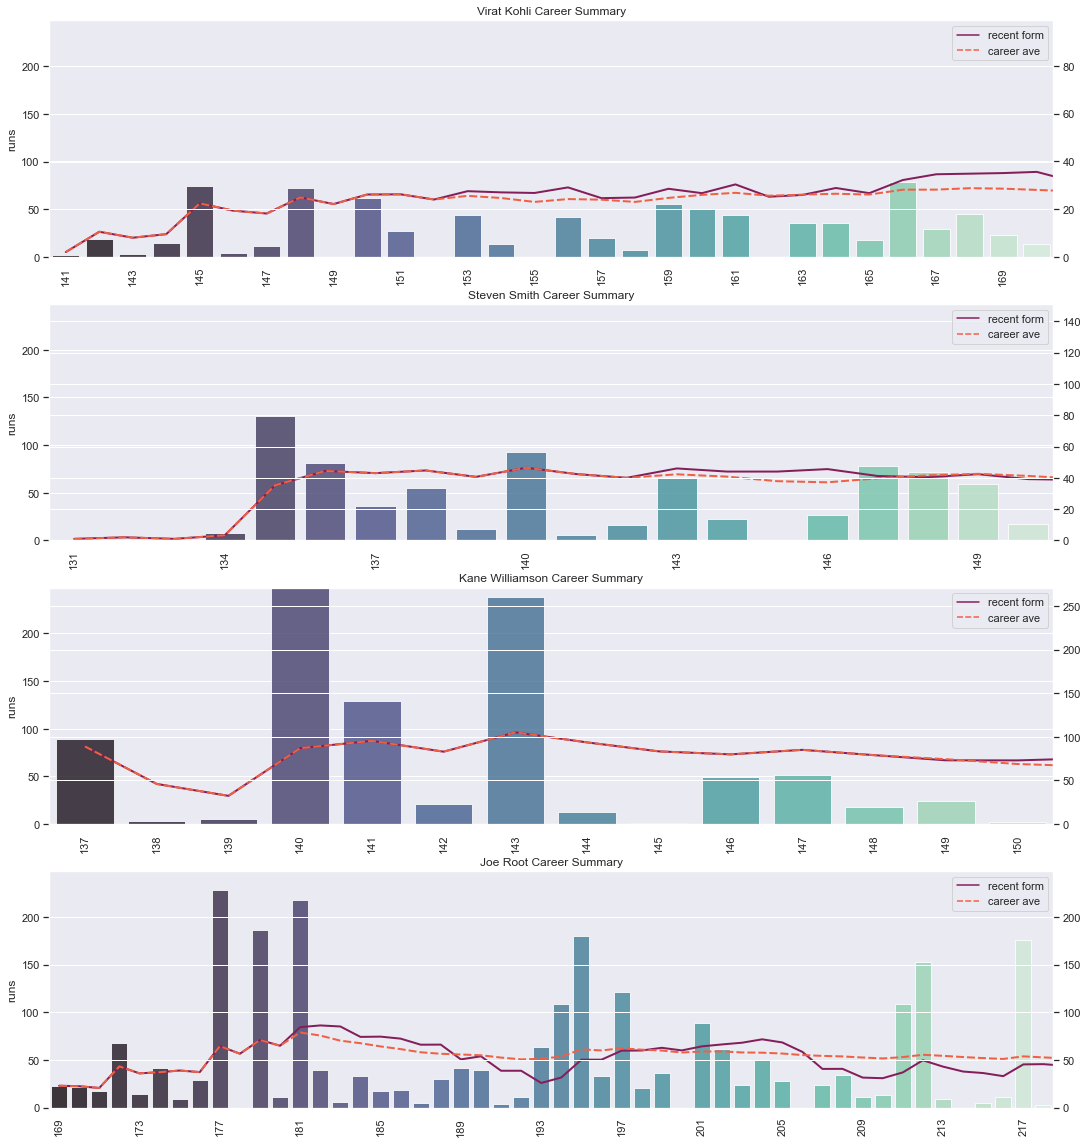

In [50]:
gf.graph_career_batting_summary(top_four_stats['calculate_recent_form_average'], top_four_stats['calculate_running_average'], top_four_comms)